# Multiple Linear Regression Notebook

## Data Set Creation

In [3]:
import pandas as pd

data = pd.DataFrame({"Resp":[1,4,1,3,2,4], 
                     "Size":[1,8,3,5,6,10], 
                     "Circ":[2,8,1,7,4,6]})
data

,Resp,Size,Circ
0,1,1,2
1,4,8,8
2,1,3,1
3,3,5,7
4,2,6,4
5,4,10,6


## Visualization

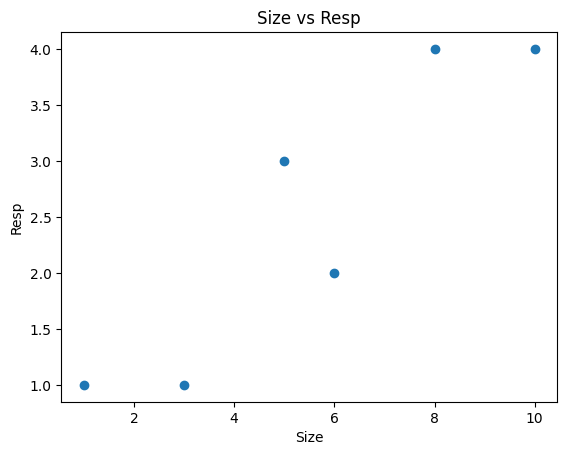

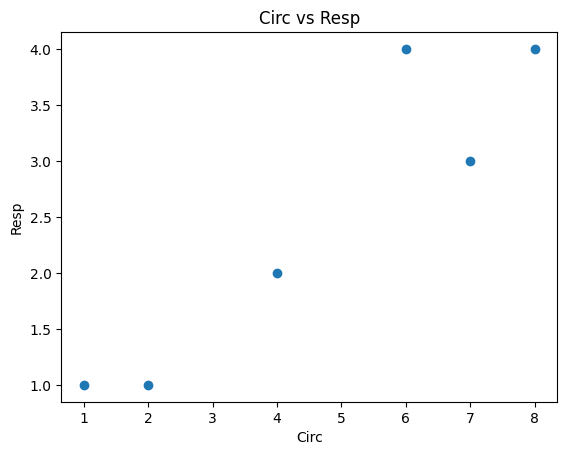

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Size against Resp
plt.figure()
plt.scatter(data["Size"], data["Resp"])
plt.xlabel("Size")
plt.ylabel("Resp")
plt.title("Size vs Resp")
plt.show()

# Circ against Resp
plt.figure()
plt.scatter(data["Circ"], data["Resp"])
plt.xlabel("Circ")
plt.ylabel("Resp")
plt.title("Circ vs Resp")
plt.show()

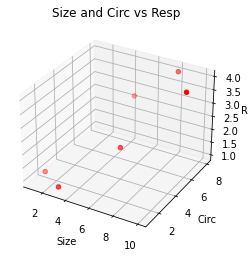

In [3]:
# Size and Circ against Resp
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

ax.scatter(data["Size"], data["Circ"], data["Resp"], c="r", marker="o")
ax.set_xlabel("Size")
ax.set_ylabel("Circ")
ax.set_zlabel("Resp")
ax.set_title("Size and Circ vs Resp")

plt.show()

## Multiple Linear Regression

In [ ]:
import statsmodels.api as sm
import numpy as np

# Select the predictors and the target
target = data["Resp"]
predictors = data.drop("Resp", axis=1)

# Add a column of ones to X for the intercept
predictors = sm.add_constant(predictors)

# Fit the model using statsmodels
model = sm.OLS(target, predictors).fit()

# Get a summary of the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Resp   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     55.44
Date:                Fri, 17 Mar 2023   Prob (F-statistic):            0.00428
Time:                        11:19:05   Log-Likelihood:                 1.0174
No. Observations:                   6   AIC:                             3.965
Df Residuals:                       3   BIC:                             3.341
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0640      0.260      0.246      0.8

/usr/local/lib/python3.9/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


## Error Statistics

In [ ]:
# We need to calculate or extract this information from the model object
sse = model.ssr
rse = np.sqrt(model.mse_resid) # it is also = np.sqrt(sse/n-2), being n = 3 in this case
mean_error = (rse/data["Resp"].mean())*100

print("SSE:",round(model.ssr, 3))
print("RSE:",round(np.sqrt(model.mse_resid), 3))
print("Mean Error:",round(mean_error, 3))

SSE: 0.25
RSE: 0.289
Mean Error: 11.553


In [ ]:
np.sqrt(model.mse_resid)*2

0.5776545915875603

## Predictions

In [ ]:
# Create the new_data object with new info about the IV.
new_data = pd.DataFrame({"Size":[7,5], 
                         "Circ":[3,2]})
new_data = sm.add_constant(new_data)

# Get prediction results with 95% confidence interval for mean predictions
pred_results = model.get_prediction(new_data).summary_frame(alpha=0.05)

# Print the predicted values
print('Predicted values:\n', pred_results['mean'].iloc[0])
# Print the prediction interval
print('95% prediction interval:\n', pred_results[['obs_ci_lower', 'obs_ci_upper']].iloc[0])

Predicted values:
 2.339894551845343
95% prediction interval:
 obs_ci_lower    1.178687
obs_ci_upper    3.501103
Name: 0, dtype: float64


In [ ]:
# Print the predicted values and confidence intervals
print('Predicted values:\n', pred_results['mean'].iloc[1])
print('95% confidence intervals:\n', pred_results[['mean_ci_lower', 'mean_ci_upper']].iloc[1])

Predicted values:
 1.6495606326889278
95% confidence intervals:
 mean_ci_lower    1.011013
mean_ci_upper    2.288108
Name: 1, dtype: float64


## Multicolinearity

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Compute the VIF for each explanatory variable
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(predictors.values, i) for i in range(predictors.shape[1])]
vif["Explanatory"] = predictors.columns

# Print the VIF table
print(vif)


   VIF Factor Explanatory
0    4.856942       const
1    2.218981        Size
2    2.218981        Circ
